# LSDDA: Hackathon #1

## Objective

#### Predict the weekly sales for the sections of a set of stores (multiple regression + time series)

## Data Structure

### Target

**sales**: volume of weekly sales for the section of a store. A negative number means that more returns were made than purchases.

### Features
* ***store (integer)***: ID of the store (unique accross the entire dataset)
* ***section***: ID of the store section
* ***date*** 
* ***store_type***: Store category
* ***store_size***: Store size (square meters)
* ***temperature***: temperature (in fahrenheit)
* ***fuel_prc***: fuel cost for the store region
* ***consumer_prc_idx***: consumer price index for the store region
* ***unemployment_rate***: unemployment rate for the store region
* ***environment_ratio_1***: a ratio of several hidden environment descriptors (level 1)
* ***environment_ratio_2***: a ratio of several hidden environment descriptors (level 2)
* ***time_agg_env_ratio***: aggregation of several hidden environment descriptors
* ***time_agg_grp_1***: observation time group (level 1)
* ***time_agg_grp_2***: observation time group (level 2)

In [1]:
# import pandas! 
import pandas as pd 

# and numpy!
import numpy as np

# visualization stuff: 
import seaborn as sns
from matplotlib import pyplot as plt 
% matplotlib inline 

# A few optional things to get rid of useless warnings, and to make plots pretty
plt.style.use('seaborn')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

# Before continuing, a very important note

1. In the learning units for time series, we teached you how to predict the next day of sales based on the sales of previous days or weeks. It has an auto-regressive component (sales depend on past sales), and also depended on exogenous variables (all other features). Here, besides the historical sales, you have inputs like temperature and fuel costs. 

2. The test set has more than one test observation per _(store, section)_ pair. This means that, if you opt to use autoregressive models, there will be test observations that you need **to predict based on the previous predictions you made**. For example, imagine that you predict the next week of sales based on a linear regression that uses the current week as input. You have the following data

In [ ]:
sales_train = pd.DataFrame(data={
    'sales': np.random.RandomState(1).rand(10)
})
sales_train

you have this simple model

In [ ]:
predict = lambda x: 0.6 * x + 0.3

and now you make the predictions

In [ ]:
predict(sales_train)

So, what would happend if I want to continue predicting? You can do something like this:

In [ ]:
current_week_sales = predict(sales_train.head(1).values)

for i in range(20): 
    current_week_sales = predict(current_week_sales)
    print(current_week_sales)

So, you **store** the value your model gave as prediction and use it as the **next input**. 

There is, at least, one problem with this approach: the error of your model predictions will propagate since the start of the training dataframe (check what was the first value for *current_week_sales*). But...we already know the predictions for the first 9 weeks, we don't need to use the model for those! So, we can start predicting from the last value of the training set

In [ ]:
current_week_sales = predict(sales_train.tail(1).values)

for i in range(10): 
    current_week_sales = predict(current_week_sales)
    print(current_week_sales)

We just _range(10)_ instead of _range(20)_ because we were predicting the remaining 10 and not the entire 20 from the start.

# Let's move, Team!

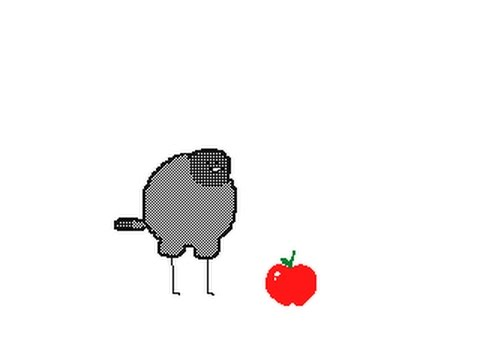

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ut-fJCc0zS4", autoplay=0)